It is that time of the year again, Commander Pre-Con Season! So once again the MtG Community is chattering about whether or not the pre-cons have enough re-print to be worth their salt. 

Oddly, I have not really encountered people talking about the value of _new_ cards over time, so let us take a look comparing each commander sets' reprints to their new cards monitary value

# Set Up

In [1]:
import os, pandas as pd, numpy as np

from mtgf.scryfall import search_all
from mtgf.pd.defaults import RELEVANT_COLUMNS

# Fetch data from Scryfall

In [2]:
def to_price(card):
    # extract USD
    usd = card.prices["usd"]
    try:
        return float(usd)
    # Scryfall has no price for this print
    except TypeError:
        return -1

def get_commander_set(i):
    query = 'set:C{}'.format(i)
    r = search_all(params={'q': query})
    df = pd.DataFrame(r).filter(items=RELEVANT_COLUMNS+['reprint', 'prices', 'set'])
    df['usd'] = df.apply(to_price, axis=1)
    return df

Now we will ask Scryfall for each commander set seperately. Otherwise, for reprints, we will just get one version of the card.

In [3]:
dfs = [get_commander_set(i) for i in range(13, 19+1)]

In [4]:
df = pd.concat(dfs, sort=True)

# Plot Value

In [5]:
import seaborn as sns, matplotlib.pyplot as plt
from mtgf.settings import IMG_DIR

<Figure size 432x288 with 0 Axes>

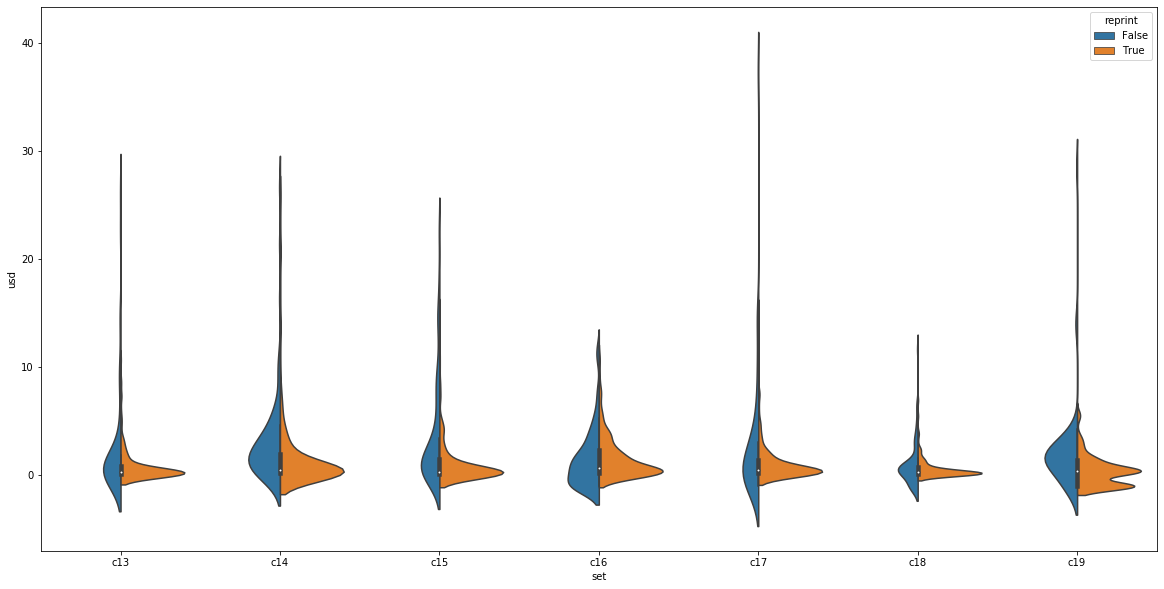

In [6]:
plt.figure()
f, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(x="set", y="usd", hue="reprint", data=df, split=True,  bw=.3)

What is with the negative values? Well Scryfall isn't perfect so we are missing some price data. We can filter these out by only taking cards with a non-negative value with `df[df.usd>=0]`. Notice that the violin will still be drawn a bit poorly due to the curve smoothing.

<Figure size 432x288 with 0 Axes>

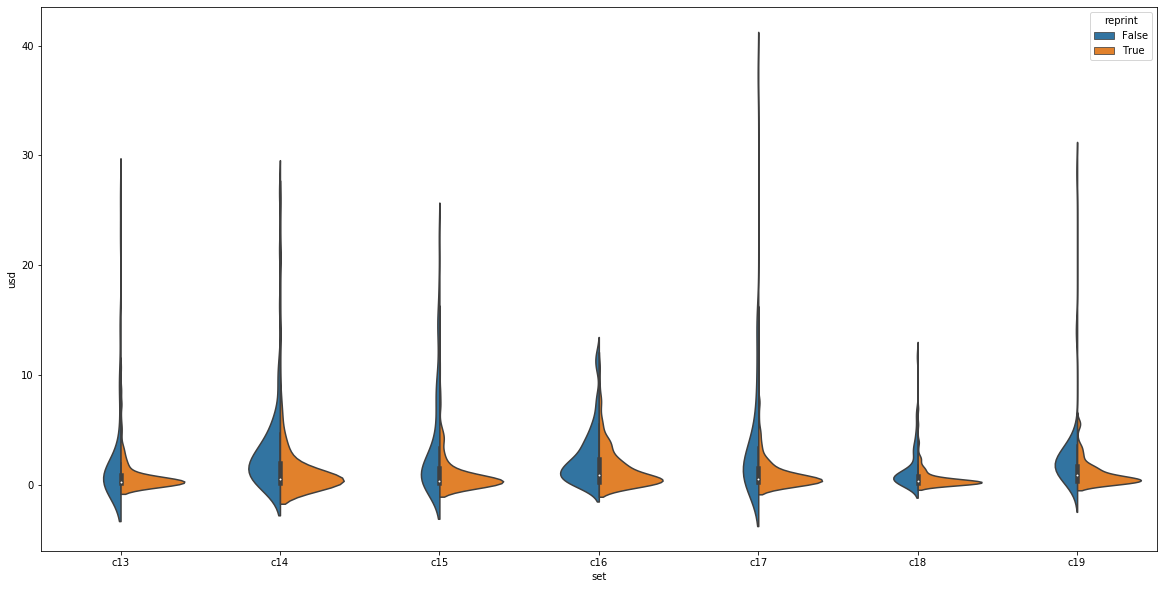

In [7]:
plt.figure()
f, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(x="set", y="usd", hue="reprint", data=df[df.usd>=0], split=True,  bw=.3)

What is that spike on C17? Well querying Scryfall with `set:c19 usd>30` gives us Teferi's Protection

In [8]:
df[(df.usd > 30) & (df.set == 'c17')]

cmc color_identity colors  edhrec_rank loyalty mana_cost  \
265  3.0            [W]    [W]        289.0     NaN    {2}{W}   

                    name                                        oracle_text  \
265  Teferi's Protection  Until your next turn, your life total can't ch...   

                                                prices rarity  reprint  set  \
265  {'usd': '37.33', 'usd_foil': None, 'eur': '30....   rare    False  c17   

    type_line    usd  
265   Instant  37.33

What about taking in all commander sets over all?

<Figure size 432x288 with 0 Axes>

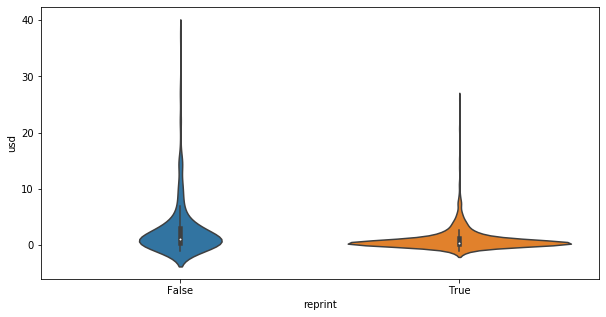

In [9]:
plt.figure()
f, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(y="usd", x="reprint", data=df,  bw=.3)

So what is the take away? Well reprints may be lacking but every now and again there is a card in one of the pre-cons that really makes it worth your while. For C19 that card is:

In [10]:
df[(df.usd > 25) & (df.set == 'c19')]

cmc color_identity colors  edhrec_rank loyalty           mana_cost  \
148  7.0            [B]    [B]       7439.0     NaN  {4}{B/P}{B/P}{B/P}   

                        name  \
148  K'rrik, Son of Yawgmoth   

                                           oracle_text  \
148  ({B/P} can be paid with either {B} or 2 life.)...   

                                                prices rarity  reprint  set  \
148  {'usd': '28.48', 'usd_foil': '29.98', 'eur': '...   rare    False  c19   

                              type_line    usd  
148  Legendary Creature — Horror Minion  28.48

So maybe the Rakdos Madness deck is the best buy after all.